In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt
import plotly.graph_objects as go
import statsmodels.api as sm
import math
import plotly.express as px
import random

In [2]:
df_netflix= pd.read_csv('/content/drive/MyDrive/netflix_titles.csv', usecols=['show_id','title','director','cast','listed_in','description'])
df_titles= pd.read_csv('/content/drive/MyDrive/titles.csv', usecols=['id','title','type','genres','imdb_votes','imdb_score','tmdb_popularity','tmdb_score'])
df_credits= pd.read_csv('/content/drive/MyDrive/credits.csv')
df_imdb= pd.read_csv('/content/drive/MyDrive/imdb_top_1000.csv', usecols=['Series_Title', 'Gross'])

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
merged_df = pd.merge(df_titles, df_credits, on='id', how='inner')

In [6]:
remerged_df = pd.merge(merged_df, df_netflix, on='title', how='inner')

In [7]:
reremerged_df = pd.merge(remerged_df, df_imdb[['Series_Title', 'Gross']], left_on='title', right_on='Series_Title', how='inner')
reremerged_df.drop('Series_Title', axis=1, inplace=True)

In [8]:
reremerged_df

,id,title,type,genres,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role,show_id,director,cast,listed_in,description,Gross
0,tm84618,Taxi Driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,3748,Robert De Niro,Travis Bickle,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...","28,262,574"
1,tm84618,Taxi Driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,14658,Jodie Foster,Iris Steensma,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...","28,262,574"
2,tm84618,Taxi Driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,7064,Albert Brooks,Tom,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...","28,262,574"
3,tm84618,Taxi Driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...","28,262,574"
4,tm84618,Taxi Driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,Betsy,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...","28,262,574"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,ts288540,Ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,66872,Manoj Bajpayee,Musafir Ali,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...","75,331,600"
2294,ts288540,Ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,67162,Kay Kay Menon,Indrashish Shah,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...","75,331,600"
2295,ts288540,Ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,235529,Harshvardhan Kapoor,Vik,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...","75,331,600"
2296,ts288540,Ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,940893,Radhika Madan,Didi,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...","75,331,600"


In [9]:
reremerged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2298 entries, 0 to 2297
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2298 non-null   object 
 1   title            2298 non-null   object 
 2   type             2298 non-null   object 
 3   genres           2298 non-null   object 
 4   imdb_score       2203 non-null   float64
 5   imdb_votes       2203 non-null   float64
 6   tmdb_popularity  2298 non-null   float64
 7   tmdb_score       2298 non-null   float64
 8   person_id        2298 non-null   int64  
 9   name             2298 non-null   object 
 10  character        2192 non-null   object 
 11  role             2298 non-null   object 
 12  show_id          2298 non-null   object 
 13  director         2262 non-null   object 
 14  cast             2298 non-null   object 
 15  listed_in        2298 non-null   object 
 16  description      2298 non-null   object 
 17  Gross         

In [10]:
reremerged_df.describe()

,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,2203.000000,2.203000e+03,2298.000000,2298.000000,2.298000e+03
mean,7.729006,4.432821e+05,30.372437,7.535091,3.864628e+05
std,0.795148,4.818192e+05,23.824240,0.659626,5.567223e+05
min,3.100000,3.200000e+01,0.849000,3.700000,2.190000e+02
25%,7.700000,9.023700e+04,15.070000,7.400000,1.496450e+04
50%,7.900000,3.038680e+05,21.822000,7.600000,7.920150e+04
75%,8.100000,5.344860e+05,40.164000,8.000000,6.199245e+05
max,8.800000,2.294231e+06,134.700000,8.453000,2.435238e+06


In [11]:
reremerged_df.columns = reremerged_df.columns.str.title()

In [12]:
print(reremerged_df.isnull().sum())

Id                   0
Title                0
Type                 0
Genres               0
Imdb_Score          95
Imdb_Votes          95
Tmdb_Popularity      0
Tmdb_Score           0
Person_Id            0
Name                 0
Character          106
Role                 0
Show_Id              0
Director            36
Cast                 0
Listed_In            0
Description          0
Gross              251
dtype: int64


In [13]:
reremerged_df['Imdb_Score'].fillna(reremerged_df['Imdb_Score'].mean(), inplace=True)

reremerged_df['Imdb_Votes'].fillna(reremerged_df['Imdb_Votes'].median(), inplace=True)

reremerged_df['Tmdb_Score'].fillna(reremerged_df['Tmdb_Score'].mean(), inplace=True)

reremerged_df['Director'].fillna('Unknown', inplace=True)

reremerged_df['Character'].fillna('Unknown', inplace=True)

most_common_cast = reremerged_df['Cast'].mode()[0]
reremerged_df['Cast'].fillna(most_common_cast, inplace=True)

# Removing commas
reremerged_df['Gross'] = reremerged_df['Gross'].replace(',', '', regex=True)

# Conversion process
reremerged_df['Gross'] = reremerged_df['Gross'].astype(float)

# Comma separated values can now be treated as decimals when calculating median
gross_median = reremerged_df['Gross'].median()
reremerged_df['Gross'].fillna(gross_median, inplace=True)


In [14]:
print(reremerged_df.isnull().sum())

Id                 0
Title              0
Type               0
Genres             0
Imdb_Score         0
Imdb_Votes         0
Tmdb_Popularity    0
Tmdb_Score         0
Person_Id          0
Name               0
Character          0
Role               0
Show_Id            0
Director           0
Cast               0
Listed_In          0
Description        0
Gross              0
dtype: int64


In [15]:
duplicate_rows = remerged_df.duplicated().sum()

print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [16]:
reremerged_df

,Id,Title,Type,Genres,Imdb_Score,Imdb_Votes,Tmdb_Popularity,Tmdb_Score,Person_Id,Name,Character,Role,Show_Id,Director,Cast,Listed_In,Description,Gross
0,tm84618,Taxi Driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,3748,Robert De Niro,Travis Bickle,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",28262574.0
1,tm84618,Taxi Driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,14658,Jodie Foster,Iris Steensma,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",28262574.0
2,tm84618,Taxi Driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,7064,Albert Brooks,Tom,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",28262574.0
3,tm84618,Taxi Driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",28262574.0
4,tm84618,Taxi Driver,MOVIE,"['drama', 'crime']",8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,Betsy,ACTOR,s2882,Daniel Oriahi,"Odunlade Adekola, Ijeoma Grace Agu, Richard Ak...","Comedies, Dramas, Independent Movies","After his father dies, a young mechanic moves ...",28262574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,ts288540,Ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,66872,Manoj Bajpayee,Musafir Ali,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...",75331600.0
2294,ts288540,Ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,67162,Kay Kay Menon,Indrashish Shah,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...",75331600.0
2295,ts288540,Ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,235529,Harshvardhan Kapoor,Vik,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...",75331600.0
2296,ts288540,Ray,SHOW,"['drama', 'thriller', 'crime']",7.1,8795.0,5.791,6.800,940893,Radhika Madan,Didi,ACTOR,s638,"Srijit Mukherji, Vasan Bala, Abhishek Chaubey","Manoj Bajpayee, Gajraj Rao, Kay Kay Menon, Ali...","International TV Shows, TV Dramas, TV Mysteries","From a satire to a psychological thriller, fou...",75331600.0


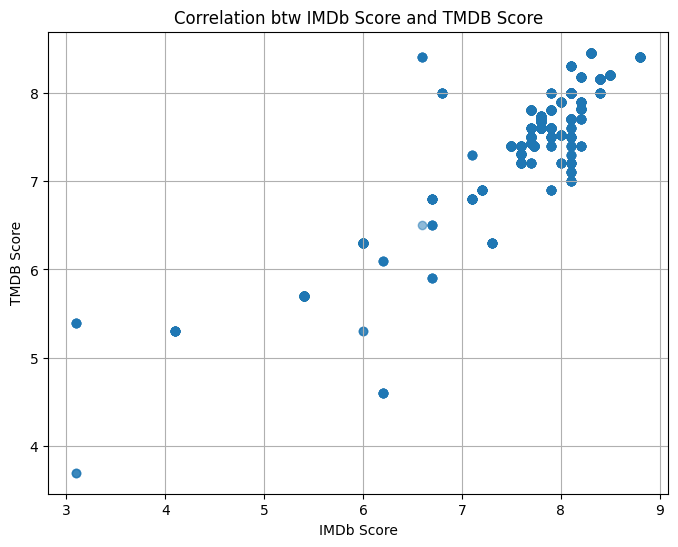

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(reremerged_df['Imdb_Score'], reremerged_df['Tmdb_Score'], alpha=0.5)
plt.title('Correlation btw IMDb Score and TMDB Score')
plt.xlabel('IMDb Score')
plt.ylabel('TMDB Score')
plt.grid(True)
plt.show()

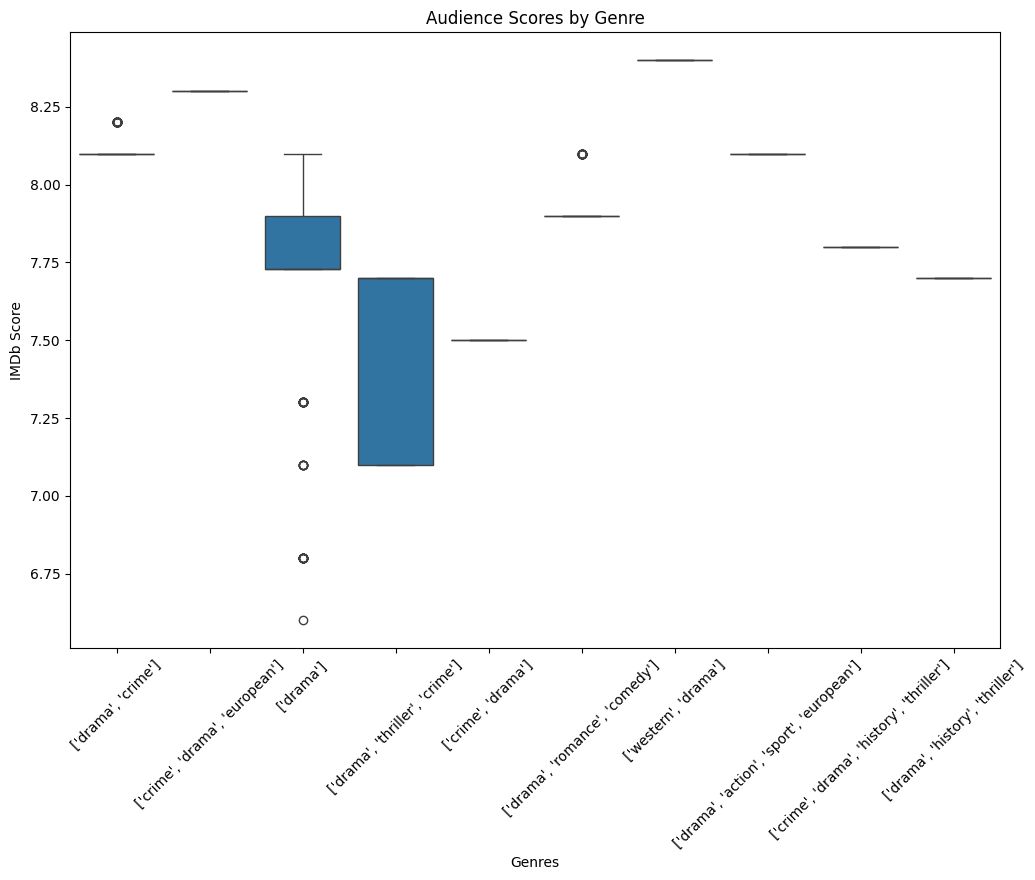

In [18]:
top_genres = reremerged_df['Genres'].value_counts().head(10).index

filtered_df = reremerged_df[reremerged_df['Genres'].isin(top_genres)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Genres', y='Imdb_Score', data=filtered_df)
plt.title('Audience Scores by Genre')
plt.xlabel('Genres')
plt.ylabel('IMDb Score')
plt.xticks(rotation=45)
plt.show()

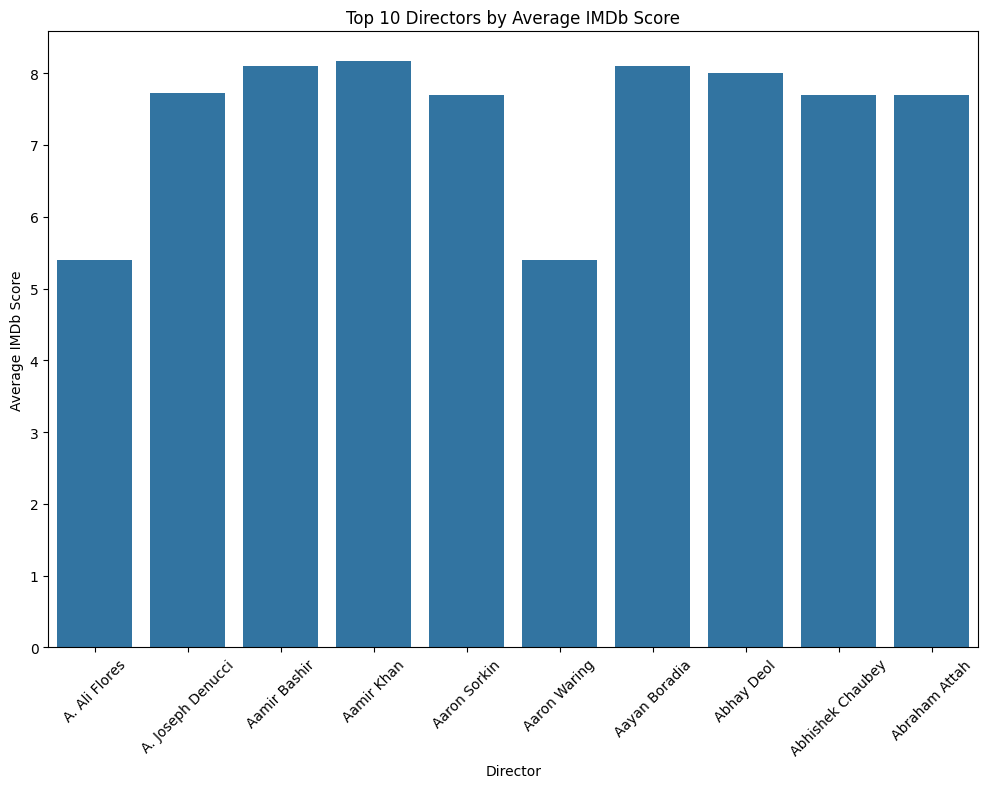

In [87]:
director_avg_imdb_scores = reremerged_df.groupby('Name')['Imdb_Score'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Name', y='Imdb_Score', data=director_avg_imdb_scores.head(10))
plt.title('Top 10 Directors by Average IMDb Score')
plt.xlabel('Director')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=45)
plt.show()

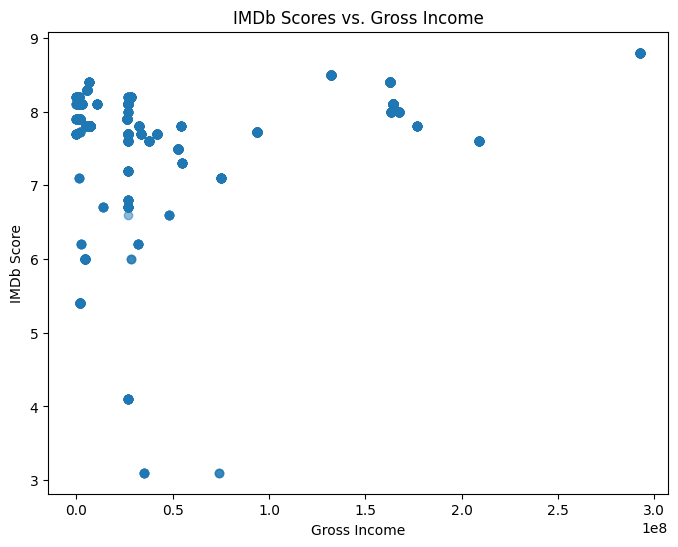

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(reremerged_df['Gross'], reremerged_df['Imdb_Score'], alpha=0.5)
plt.title('IMDb Scores vs. Gross Income')
plt.xlabel('Gross Income')
plt.ylabel('IMDb Score')
plt.show()